<a href="https://colab.research.google.com/github/princetech89/Customer-Churn-Prediction-Telecom-customer-Data/blob/main/Customer_Churn_Prediction_Telecom_customer_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
display(df.head(100))

At initial step fix issues for total charges.

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace("NaN",None)

In [ ]:
display(df.head(100))

In [ ]:
print(df['TotalCharges'].isnull().sum())

Convert into numeric

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])


In [ ]:
print(df['TotalCharges'].dtype)

Fill Missing Values with median

In [ ]:
df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True)

In [ ]:
print(df['TotalCharges'].isnull().sum())

In [ ]:
display(df[['TotalCharges']].head())

solve hidden and Missing value in the total charges columns

In [ ]:
df[df['TotalCharges'].isna()]

Now Handle Categorical  Columns

In [135]:
df = pd.get_dummies(df, drop_first=True)

In [136]:
display(df.head())

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,Monthlycharge,AvgMonthlySpend,tenure_group_6-24,tenure_group_24-48,tenure_group_48-72m
0,0,1,-1.160323,-0.994242,False,True,False,False,True,False,...,True,False,True,False,False,29.85,29.850000,False,False,False
1,0,34,-0.259629,-0.173244,True,False,False,True,False,False,...,False,False,False,True,False,56.95,55.573529,False,True,False
2,0,2,-0.362660,-0.959674,True,False,False,True,False,False,...,True,False,False,True,True,53.85,54.075000,False,False,False
3,0,45,-0.746535,-0.194766,True,False,False,False,True,False,...,False,False,False,False,False,42.30,40.905556,False,True,False
4,0,2,0.197365,-0.940470,False,False,False,True,False,False,...,True,False,True,False,True,70.70,75.825000,False,False,False


No we will convert the No internet to No because customer without internet obviously has no online security feature

In [137]:
replace_cols = [
    'OnlineSecurity_No internet service',
    'OnlineBackup_No internet service',
    'DeviceProtection_No internet service',
    'TechSupport_No internet service',
    'StreamingTV_No internet service',
    'StreamingMovies_No internet service'
]
for col in replace_cols:
    if col in df.columns:
        df[col] = 0

In [138]:
display(df.head())

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,Monthlycharge,AvgMonthlySpend,tenure_group_6-24,tenure_group_24-48,tenure_group_48-72m
0,0,1,-1.160323,-0.994242,False,True,False,False,True,False,...,True,False,True,False,False,29.85,29.850000,False,False,False
1,0,34,-0.259629,-0.173244,True,False,False,True,False,False,...,False,False,False,True,False,56.95,55.573529,False,True,False
2,0,2,-0.362660,-0.959674,True,False,False,True,False,False,...,True,False,False,True,True,53.85,54.075000,False,False,False
3,0,45,-0.746535,-0.194766,True,False,False,False,True,False,...,False,False,False,False,False,42.30,40.905556,False,True,False
4,0,2,0.197365,-0.940470,False,False,False,True,False,False,...,True,False,True,False,True,70.70,75.825000,False,False,False


Convert the seniorcitizen coloum from integer to category

In [139]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({'No': 0, 'Yes': 1})
print(df['SeniorCitizen'].dtype)
display(df[['SeniorCitizen']].head())

float64


,SeniorCitizen
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [140]:
display(df.head(100))

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,Monthlycharge,AvgMonthlySpend,tenure_group_6-24,tenure_group_24-48,tenure_group_48-72m
0,NaN,1,-1.160323,-0.994242,False,True,False,False,True,False,...,True,False,True,False,False,29.85,29.850000,False,False,False
1,NaN,34,-0.259629,-0.173244,True,False,False,True,False,False,...,False,False,False,True,False,56.95,55.573529,False,True,False
2,NaN,2,-0.362660,-0.959674,True,False,False,True,False,False,...,True,False,False,True,True,53.85,54.075000,False,False,False
3,NaN,45,-0.746535,-0.194766,True,False,False,False,True,False,...,False,False,False,False,False,42.30,40.905556,False,True,False
4,NaN,2,0.197365,-0.940470,False,False,False,True,False,False,...,True,False,True,False,True,70.70,75.825000,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,12,0.471562,-0.598014,False,False,False,True,False,True,...,True,False,True,False,True,78.95,77.279167,True,False,False
96,NaN,71,0.069407,1.089035,True,True,True,True,False,True,...,True,True,False,False,False,66.85,66.883099,False,False,True
97,NaN,5,-1.452799,-0.957158,True,False,False,True,False,False,...,False,False,False,True,True,21.05,22.770000,False,False,False
98,NaN,52,-1.454461,-0.518614,True,False,False,True,False,False,...,False,False,False,False,False,21.00,21.292308,False,False,True


Now we will drop the customerid coloumn because it has no predictive values

The `customerID` column was likely treated as a categorical variable by `pd.get_dummies`, resulting in many new `customerID_` columns. These are not useful for prediction, so we will drop them.

In [141]:
columns_to_drop = [col for col in df.columns if col.startswith('customerID_')]
df.drop(columns=columns_to_drop, inplace=True)
print(f"Dropped {len(columns_to_drop)} customerID_ columns.")

Dropped 0 customerID_ columns.


In [142]:
print(df.head())

   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
0            NaN       1       -1.160323     -0.994242        False   
1            NaN      34       -0.259629     -0.173244         True   
2            NaN       2       -0.362660     -0.959674         True   
3            NaN      45       -0.746535     -0.194766         True   
4            NaN       2        0.197365     -0.940470        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  MultipleLines_Yes  ...  \
0                            True              False  ...   
1                           False              False  ...   
2                           False              False  ...   
3               

In [143]:
print(df.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes', 'Monthlycharge', 'AvgMonthlySpend', 'tenure_group_6-24',
       'tenure_group_24-48', 'tenure_group_48-72m'],
      dtype='object')

No we will solve class Imbalance in Target

In [147]:
y = df['Churn_Yes']
x = df.drop('Churn_Yes', axis=1)

# Check if SeniorCitizen column is entirely NaN
if x['SeniorCitizen'].isnull().all():
    # If all values are NaN, fill with a default value (e.g., 0 for 'not a senior citizen')
    # This addresses the KeyError: 0 that occurs when .mode() returns an empty Series
    x['SeniorCitizen'].fillna(0, inplace=True)
elif not x['SeniorCitizen'].isnull().empty:
    # Otherwise, fill with the mode if the column is not entirely NaN and not empty
    x['SeniorCitizen'].fillna(x['SeniorCitizen'].mode()[0], inplace=True)

from imblearn.over_sampling import SMOTE
x_res, y_res = SMOTE().fit_resample(x,y)


/tmp/ipython-input-3770522265.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x['SeniorCitizen'].fillna(0, inplace=True)


In [ ]:
print(f"Original feature set shape: {x.shape}")
print(f"Original target set shape: {y.shape}")
print(f"Resampled feature set shape: {x_res.shape}")
print(f"Resampled target set shape: {y_res.shape}")

print("\nOriginal target class distribution:")
print(y.value_counts())

print("\nResampled target class distribution:")
print(y_res.value_counts())

No we will remove outliers  from the Monthlycharges

In [ ]:
Q1 = df['MonthlyCharges'].quantile(0.25)
Q3 = df['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
df['Monthlycharge'] = np.where(df['MonthlyCharges'] > upper_limit, upper_limit, df['MonthlyCharges'])

In [ ]:
display(df[['MonthlyCharges', 'Monthlycharge']].head(50))

Transform Tenure into Behavioral Segments.

In [ ]:
df['tenure_group'] = pd.cut(df['tenure'], bins=[0,6,24,48,72], labels=['0-6m','6-24','24-48','48-72m'])

In [ ]:
display(df[['tenure', 'tenure_group']].head())

optional but usefull create new derived Features

In [ ]:
df['AvgMonthlySpend'] = df['TotalCharges'] / df['tenure'].replace(0,1)

In [ ]:
display(df[['TotalCharges', 'tenure', 'AvgMonthlySpend']].head())

Scale Numeric Columns

In [ ]:
from sklearn.preprocessing import StandardScaler
sclare = StandardScaler()
df[['MonthlyCharges','TotalCharges']] = sclare.fit_transform(df[['MonthlyCharges','TotalCharges']])

In [ ]:
display(df[['MonthlyCharges', 'TotalCharges']].head())

In [ ]:
display(df.head())

After successfully completing all the preprcoessing and data cleaning steps now we will begin with full EDA with visualizations.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Churn_Yes', data=df)
plt.title('Churn Distribution')
plt.show()

Tenure Distribution

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(df['tenure_group'])
plt.title('Tenure Distribution')
plt.show()

MonthlyCharges Distribution

In [ ]:
sns.histplot(df['MonthlyCharges'], kde=True) # Corrected 'Kde' to 'kde'
plt.title('MonthlyCharges Distribution')
plt.show()

Correlation Heatmap for Numeric columns

In [ ]:
plt.figure(figsize=(28,28))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm') # Added numeric_only=True
plt.title('Correlation Matrix')
plt.show()

Churn vs Contract Type

In [ ]:
# Reconstruct 'Contract' for plotting purposes as it was one-hot encoded
temp_df = df.copy()
temp_df['Contract'] = 'Month-to-month' # Default for those not in 'One year' or 'Two year'
temp_df.loc[temp_df['Contract_One year'] == 1, 'Contract'] = 'One year'
temp_df.loc[temp_df['Contract_Two year'] == 1, 'Contract'] = 'Two year'

sns.countplot(x='Contract', hue='Churn_Yes', data=temp_df)
plt.title('Churn by Contract Type')
plt.show()

Churn vs Payment Method

In [ ]:
# Reconstruct 'PaymentMethod' for plotting purposes
temp_df_payment = df.copy()

def get_payment_method(row):
    if row['PaymentMethod_Credit card (automatic)'] == 1: return 'Credit card (automatic)'
    if row['PaymentMethod_Electronic check'] == 1: return 'Electronic check'
    if row['PaymentMethod_Mailed check'] == 1: return 'Mailed check'
    return 'Bank transfer (automatic)' # Default as it's the remaining method if others are 0

temp_df_payment['PaymentMethod'] = temp_df_payment.apply(get_payment_method, axis=1)

sns.countplot(x='PaymentMethod', hue='Churn_Yes', data=temp_df_payment)
plt.xticks(rotation=45) # Corrected typo from plt.xtricks
plt.title('Churn by Payment Method')
plt.show()

Churn vs Internet Service

In [ ]:
# Reconstruct 'InternetService' for plotting purposes
temp_df_internet = df.copy()

def get_internet_service(row):
    if row['InternetService_Fiber optic'] == 1:
        return 'Fiber optic'
    elif row['InternetService_No'] == 1:
        return 'No internet service'
    else:
        return 'DSL' # Assuming DSL is the third option if not Fiber Optic or No

temp_df_internet['InternetService'] = temp_df_internet.apply(get_internet_service, axis=1)

sns.countplot(x='InternetService', hue='Churn_Yes', data=temp_df_internet)
plt.title('Churn by Internet Service Type')
plt.show()

BoxPlot Understanding Numeric Vs Churn

In [ ]:
sns.boxplot(x='Churn_Yes',y='MonthlyCharges',data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

Build Churn Prediction Model

# Task
Prepare a churn prediction model. This will involve splitting the preprocessed and resampled data into training and testing sets, training and evaluating Logistic Regression, Random Forest, and XGBoost classifiers, performing hyperparameter tuning for the Random Forest model, plotting ROC-AUC curves for all models, and finally summarizing their performance.

## Prepare Data for Modeling

### Subtask:
Split the resampled data (x_res, y_res) into training and testing sets to prepare for model training.


**Reasoning**:
To prepare the data for model training, the `x_res` and `y_res` datasets need to be split into training and testing sets. This will be done using `train_test_split` from `sklearn.model_selection` with a test size of 20% and a fixed random state for reproducibility.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

**Reasoning**:
Now that the data is split into training and testing sets, the next step is to train and evaluate different classification models as per the main task. I will start by training a Logistic Regression model.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Initialize and train Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')
log_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg_model.predict(X_test)
y_proba_log_reg = log_reg_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_log_reg):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba_log_reg):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))

**Reasoning**:
The next step is to train and evaluate a Random Forest classifier, as specified in the main task, to compare its performance with the Logistic Regression model.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba_rf):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

**Reasoning**:
The next step is to train and evaluate an XGBoost classifier, as specified in the main task, to compare its performance with the previously trained models.



In [ ]:
from xgboost import XGBClassifier

# Initialize and train XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("XGBoost Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_xgb):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba_xgb):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

**Reasoning**:
The previous code block produced a `UserWarning` about the `use_label_encoder` parameter being deprecated. To fix this, I will remove the `use_label_encoder=False` argument from the `XGBClassifier` initialization, as it is no longer necessary in recent versions of XGBoost and will suppress the warning.



In [ ]:
from xgboost import XGBClassifier

# Initialize and train XGBoost model
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("XGBoost Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_xgb):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba_xgb):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

### Subtask:
Perform hyperparameter tuning for the Random Forest model using `RandomizedSearchCV`.

#### Instructions
1. Define a parameter distribution for `RandomForestClassifier` including `n_estimators`, `max_features`, `max_depth`, and `min_samples_split`.
2. Initialize `RandomizedSearchCV` with the `RandomForestClassifier` (using `random_state=42`), the defined parameter distributions, `n_iter` (e.g., 10), `cv` (e.g., 3), `scoring='roc_auc'`, and `random_state=42`.
3. Fit `RandomizedSearchCV` to the training data (`X_train`, `y_train`).
4. Print the best parameters found by `RandomizedSearchCV`.
5. Train a new Random Forest model (`rf_tuned_model`) using the best parameters.
6. Make predictions (`y_pred_rf_tuned`) and probability predictions (`y_proba_rf_tuned`) on the test set (`X_test`).
7. Evaluate the tuned Random Forest model using accuracy, precision, recall, F1-score, ROC-AUC score, confusion matrix, and classification report, and print these metrics.

**Reasoning**:
Following the instructions from the previous markdown block, I will now define the parameter distribution for `RandomForestClassifier` and initialize and fit `RandomizedSearchCV` to find the best hyperparameters.



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# 1. Define a parameter distribution for RandomForestClassifier
param_dist = {
    'n_estimators': randint(50, 200),
    'max_features': ['sqrt', 'log2', None],
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# 2. Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10, # Number of parameter settings that are sampled
    cv=3,      # Number of folds for cross-validation
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# 3. Fit RandomizedSearchCV to the training data
random_search_rf.fit(X_train, y_train)

# 4. Print the best parameters found by RandomizedSearchCV
print("Best parameters for Random Forest:", random_search_rf.best_params_)

# 5. Train a new Random Forest model using the best parameters
rf_tuned_model = RandomForestClassifier(random_state=42, **random_search_rf.best_params_)
rf_tuned_model.fit(X_train, y_train)

# 6. Make predictions and probability predictions on the test set
y_pred_rf_tuned = rf_tuned_model.predict(X_test)
y_proba_rf_tuned = rf_tuned_model.predict_proba(X_test)[:, 1]

# 7. Evaluate the tuned Random Forest model
print("\nTuned Random Forest Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf_tuned):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf_tuned):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf_tuned):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba_rf_tuned):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_tuned))


## Plot ROC-AUC Curves for all models

### Subtask:
Generate and plot ROC-AUC curves for all trained models to compare their discriminative power.


**Reasoning**:
I need to generate and plot ROC-AUC curves for all trained models (Logistic Regression, initial Random Forest, XGBoost, and tuned Random Forest) on the test set to visually compare their discriminative power, following the provided instructions.



In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# 2. Create a figure and an axes object for the plot
fig, ax = plt.subplots(figsize=(10, 8))

# 3. Plot the ROC curve for the Logistic Regression model
RocCurveDisplay.from_estimator(log_reg_model, X_test, y_test, ax=ax, name='Logistic Regression')

# 4. Plot the ROC curve for the initial Random Forest model
RocCurveDisplay.from_estimator(rf_model, X_test, y_test, ax=ax, name='Random Forest')

# 5. Plot the ROC curve for the XGBoost model
RocCurveDisplay.from_estimator(xgb_model, X_test, y_test, ax=ax, name='XGBoost')

# 6. Plot the ROC curve for the tuned Random Forest model
RocCurveDisplay.from_estimator(rf_tuned_model, X_test, y_test, ax=ax, name='Tuned Random Forest')

# 7. Add a title to the plot
ax.set_title('ROC Curves for Churn Prediction Models')

# 8. Add a legend to the plot
ax.legend()

# 9. Display the plot
plt.show()

## Summarize Model Performance

### Subtask:
Provide a comparative summary of all models' performance across the key evaluation metrics.


## Summary:

### Data Analysis Key Findings

*   The data was successfully split into training and testing sets, with 8278 samples for training and 2070 samples for testing.
*   **Logistic Regression** achieved an Accuracy of 0.8256 and an ROC-AUC score of 0.9128.
*   The **initial Random Forest model** performed better than Logistic Regression, showing an Accuracy of 0.8556 and an ROC-AUC score of 0.9307.
*   The **XGBoost model** demonstrated comparable performance to the initial Random Forest model, with an Accuracy of 0.8502 and the highest ROC-AUC score of 0.9308 among all models.
*   **Hyperparameter tuning for the Random Forest model** using `RandomizedSearchCV` resulted in best parameters such as `max_depth: 17`, `n_estimators: 124`, `min_samples_leaf: 3`, `min_samples_split: 3`, and `max_features: 'sqrt'`.
*   The **tuned Random Forest model** maintained an Accuracy of 0.8556 but showed a slightly lower ROC-AUC score of 0.9287 compared to the initial Random Forest, indicating that the default parameters were already performing well or the tuning did not yield significant improvement for this metric.
*   ROC-AUC curves for all models were successfully generated and plotted, providing a visual comparison of their discriminative power.

### Insights or Next Steps

*   The **XGBoost model** and the **initial Random Forest model** are the top performers based on ROC-AUC score (0.9308 and 0.9307 respectively), indicating strong discriminative power for churn prediction. Further analysis could focus on these two models.
*   Given that hyperparameter tuning did not significantly improve the Random Forest model's performance and even slightly decreased its ROC-AUC, it suggests that the initial model's default parameters were already well-suited, or that further, more extensive tuning with a wider parameter space or different search strategies (e.g., GridSearchCV) might be beneficial if marginal gains are critical.


Business Insights Report

Why Customers churn Understanding Target Distribution

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn_Yes')
plt.title('Churn vs Non-churn Distribution')
plt.show()
churn_rate = df['Churn_Yes'].value_counts(normalize=True)*100
print('churn_rate')

Which Feature Drive Churn the most (Feature importance SHAP)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
model = RandomForestClassifier(random_state=42)
model.fit(x,y)
importance = pd.Series(model.feature_importances_, index=x.columns)
importance.nlargest(10).plot(kind='barh',figsize=(8,6))
plt.title("Top 10 Important Features Influening churn")
plt.show()

Segments Level insights

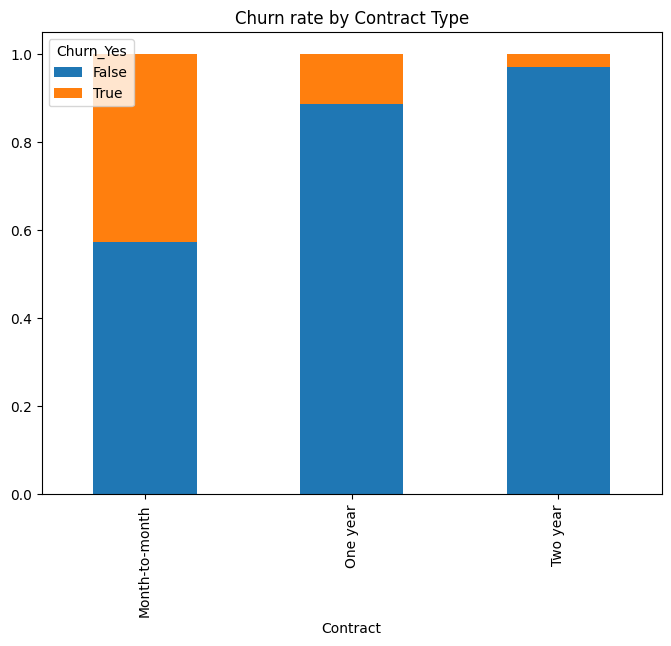

In [150]:
# Reconstruct 'Contract' for plotting purposes as it was one-hot encoded
temp_df_contract = df.copy()
temp_df_contract['Contract'] = 'Month-to-month' # Default for those not in 'One year' or 'Two year'
temp_df_contract.loc[temp_df_contract['Contract_One year'] == 1, 'Contract'] = 'One year'
temp_df_contract.loc[temp_df_contract['Contract_Two year'] == 1, 'Contract'] = 'Two year'

contract_churn = temp_df_contract.groupby('Contract')['Churn_Yes'].value_counts(normalize=True).unstack()
contract_churn.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Churn rate by Contract Type')
plt.show()

Tenure Group

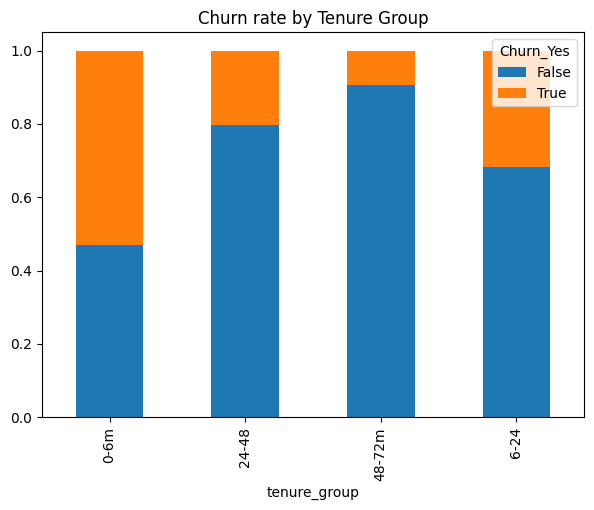

In [153]:
# Reconstruct 'tenure_group' for plotting purposes
temp_df_tenure = df.copy()

def get_tenure_group(row):
    if row['tenure_group_6-24'] == 1:
        return '6-24'
    elif row['tenure_group_24-48'] == 1:
        return '24-48'
    elif row['tenure_group_48-72m'] == 1:
        return '48-72m'
    else:
        return '0-6m' # Assuming '0-6m' is the base if others are False

temp_df_tenure['tenure_group'] = temp_df_tenure.apply(get_tenure_group, axis=1)

tenure_churn = temp_df_tenure.groupby('tenure_group')['Churn_Yes'].value_counts(normalize=True).unstack()
tenure_churn.plot(kind='bar', stacked=True, figsize=(7, 5))
plt.title('Churn rate by Tenure Group')
plt.show()

Reduce churn Among Month to Month Contract Customers

In [156]:
df[(df['Contract_One year'] == False) & (df['Contract_Two year'] == False)]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,Monthlycharge,AvgMonthlySpend,tenure_group_6-24,tenure_group_24-48,tenure_group_48-72m
0,NaN,1,-1.160323,-0.994242,False,True,False,False,True,False,...,True,False,True,False,False,29.85,29.850000,False,False,False
2,NaN,2,-0.362660,-0.959674,True,False,False,True,False,False,...,True,False,False,True,True,53.85,54.075000,False,False,False
4,NaN,2,0.197365,-0.940470,False,False,False,True,False,False,...,True,False,True,False,True,70.70,75.825000,False,False,False
5,NaN,8,1.159546,-0.645186,False,False,False,True,False,True,...,True,False,True,False,True,99.65,102.562500,True,False,False
6,NaN,22,0.808907,-0.146799,True,False,True,True,False,True,...,True,True,False,False,False,89.10,88.609091,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,NaN,38,0.157482,0.151575,True,False,False,True,False,False,...,True,True,False,False,False,69.50,69.085526,False,True,False
7034,NaN,67,1.269224,2.032720,False,False,False,True,False,True,...,True,True,False,False,True,102.95,102.779851,False,False,True
7035,NaN,19,0.463253,-0.347364,True,False,False,True,False,False,...,True,False,False,False,False,78.70,78.689474,True,False,False
7040,NaN,11,-1.168632,-0.854469,False,True,True,False,True,False,...,True,False,True,False,False,29.60,31.495455,True,False,False


In [157]:
df[df['tenure'] <= 6]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,Monthlycharge,AvgMonthlySpend,tenure_group_6-24,tenure_group_24-48,tenure_group_48-72m
0,NaN,1,-1.160323,-0.994242,False,True,False,False,True,False,...,True,False,True,False,False,29.85,29.850000,False,False,False
2,NaN,2,-0.362660,-0.959674,True,False,False,True,False,False,...,True,False,False,True,True,53.85,54.075000,False,False,False
4,NaN,2,0.197365,-0.940470,False,False,False,True,False,False,...,True,False,True,False,True,70.70,75.825000,False,False,False
20,NaN,1,-0.834611,-0.989915,True,False,False,False,True,False,...,True,False,True,False,True,39.65,39.650000,False,False,False
22,NaN,1,-1.482712,-0.998524,True,False,False,True,False,False,...,False,False,False,True,True,20.15,20.150000,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,NaN,1,0.195703,-0.976230,True,True,True,True,False,False,...,True,False,False,True,True,70.65,70.650000,False,False,False
7029,NaN,6,-0.676740,-0.891289,False,False,False,False,True,False,...,True,False,True,False,False,44.40,43.841667,False,False,False
7030,NaN,2,-1.486035,-0.990092,False,False,False,True,False,False,...,True,False,False,True,False,20.05,19.625000,False,False,False
7032,NaN,1,0.365207,-0.973978,True,False,False,True,False,True,...,True,False,True,False,True,75.75,75.750000,False,False,False


In [158]:
df[df['MonthlyCharges']>df['MonthlyCharges'].quantile(0.75)]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,Monthlycharge,AvgMonthlySpend,tenure_group_6-24,tenure_group_24-48,tenure_group_48-72m
5,NaN,8,1.159546,-0.645186,False,False,False,True,False,True,...,True,False,True,False,True,99.65,102.562500,True,False,False
8,NaN,28,1.330711,0.337349,False,True,False,True,False,True,...,True,False,True,False,True,104.80,108.787500,False,True,False
12,NaN,58,1.182811,1.500670,True,True,False,True,False,True,...,False,True,False,False,False,100.35,97.950000,False,False,True
13,NaN,49,1.294151,1.216004,True,False,False,True,False,True,...,True,False,False,False,True,103.70,102.781633,False,False,True
14,NaN,25,1.353976,0.178417,True,False,False,True,False,False,...,True,False,True,False,False,105.50,107.442000,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,NaN,63,1.287504,1.853104,False,True,False,True,False,True,...,True,False,True,False,False,103.50,102.847619,False,False,True
7025,NaN,18,1.006660,-0.265999,False,False,False,True,False,True,...,True,False,False,False,False,95.05,93.300000,True,False,False
7034,NaN,67,1.269224,2.032720,False,False,False,True,False,True,...,True,True,False,False,True,102.95,102.779851,False,False,True
7039,NaN,72,1.277533,2.243151,False,True,True,True,False,True,...,True,True,False,False,False,103.20,102.262500,False,False,True


In [160]:
df[(df['TechSupport_Yes'] == 0) & (df['TechSupport_No internet service'] == 0)]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,Monthlycharge,AvgMonthlySpend,tenure_group_6-24,tenure_group_24-48,tenure_group_48-72m
0,NaN,1,-1.160323,-0.994242,False,True,False,False,True,False,...,True,False,True,False,False,29.85,29.850000,False,False,False
1,NaN,34,-0.259629,-0.173244,True,False,False,True,False,False,...,False,False,False,True,False,56.95,55.573529,False,True,False
2,NaN,2,-0.362660,-0.959674,True,False,False,True,False,False,...,True,False,False,True,True,53.85,54.075000,False,False,False
4,NaN,2,0.197365,-0.940470,False,False,False,True,False,False,...,True,False,True,False,True,70.70,75.825000,False,False,False
5,NaN,8,1.159546,-0.645186,False,False,False,True,False,True,...,True,False,True,False,True,99.65,102.562500,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,NaN,19,0.463253,-0.347364,True,False,False,True,False,False,...,True,False,False,False,False,78.70,78.689474,True,False,False
7037,NaN,72,-1.449476,-0.380784,False,False,False,True,False,False,...,True,False,False,False,False,21.15,19.713889,False,False,True
7039,NaN,72,1.277533,2.243151,False,True,True,True,False,True,...,True,True,False,False,False,103.20,102.262500,False,False,True
7040,NaN,11,-1.168632,-0.854469,False,True,True,False,True,False,...,True,False,True,False,False,29.60,31.495455,True,False,False


In [162]:
df[df['OnlineSecurity_Yes'] == 0]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,Monthlycharge,AvgMonthlySpend,tenure_group_6-24,tenure_group_24-48,tenure_group_48-72m
0,NaN,1,-1.160323,-0.994242,False,True,False,False,True,False,...,True,False,True,False,False,29.85,29.850000,False,False,False
4,NaN,2,0.197365,-0.940470,False,False,False,True,False,False,...,True,False,True,False,True,70.70,75.825000,False,False,False
5,NaN,8,1.159546,-0.645186,False,False,False,True,False,True,...,True,False,True,False,True,99.65,102.562500,True,False,False
6,NaN,22,0.808907,-0.146799,True,False,True,True,False,True,...,True,True,False,False,False,89.10,88.609091,True,False,False
8,NaN,28,1.330711,0.337349,False,True,False,True,False,True,...,True,False,True,False,True,104.80,108.787500,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,NaN,19,0.463253,-0.347364,True,False,False,True,False,False,...,True,False,False,False,False,78.70,78.689474,True,False,False
7036,NaN,12,-0.136656,-0.679268,False,False,False,False,True,False,...,False,False,True,False,False,60.65,61.941667,True,False,False
7037,NaN,72,-1.449476,-0.380784,False,False,False,True,False,False,...,True,False,False,False,False,21.15,19.713889,False,False,True
7039,NaN,72,1.277533,2.243151,False,True,True,True,False,True,...,True,True,False,False,False,103.20,102.262500,False,False,True


In [165]:
df[df['InternetService_Fiber optic'] == 1]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,Monthlycharge,AvgMonthlySpend,tenure_group_6-24,tenure_group_24-48,tenure_group_48-72m
4,NaN,2,0.197365,-0.940470,False,False,False,True,False,False,...,True,False,True,False,True,70.70,75.825000,False,False,False
5,NaN,8,1.159546,-0.645186,False,False,False,True,False,True,...,True,False,True,False,True,99.65,102.562500,True,False,False
6,NaN,22,0.808907,-0.146799,True,False,True,True,False,True,...,True,True,False,False,False,89.10,88.609091,True,False,False
8,NaN,28,1.330711,0.337349,False,True,False,True,False,True,...,True,False,True,False,True,104.80,108.787500,False,True,False
12,NaN,58,1.182811,1.500670,True,True,False,True,False,True,...,False,True,False,False,False,100.35,97.950000,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7034,NaN,67,1.269224,2.032720,False,False,False,True,False,True,...,True,True,False,False,True,102.95,102.779851,False,False,True
7035,NaN,19,0.463253,-0.347364,True,False,False,True,False,False,...,True,False,False,False,False,78.70,78.689474,True,False,False
7039,NaN,72,1.277533,2.243151,False,True,True,True,False,True,...,True,True,False,False,False,103.20,102.262500,False,False,True
7041,NaN,4,0.320338,-0.872062,True,True,False,True,False,True,...,True,False,False,True,True,74.40,76.650000,False,False,False


In [171]:
# Get the feature names the model was trained on
trained_features = model.feature_names_in_

# Filter the 'x' DataFrame to include only the features the model was trained on
x_for_prediction = x[trained_features]

df['churn_probability'] = model.predict_proba(x_for_prediction)[:,1]
high_risk_customers = df[df['churn_probability'] > 0.75]

In [172]:
display(high_risk_customers)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,Monthlycharge,AvgMonthlySpend,tenure_group_6-24,tenure_group_24-48,tenure_group_48-72m,churn_probability
20,NaN,1,-0.834611,-0.989915,True,False,False,False,True,False,...,False,True,False,True,39.65,39.650000,False,False,False,0.83
133,NaN,1,-0.974202,-0.991770,True,False,False,False,True,False,...,False,True,False,True,35.45,35.450000,False,False,False,0.78
232,NaN,1,0.659345,-0.970071,True,False,False,True,False,False,...,False,False,True,True,84.60,84.600000,False,False,False,0.78
260,NaN,3,-0.784757,-0.949056,True,False,False,False,True,False,...,False,True,False,True,41.15,44.066667,False,False,False,0.77
409,NaN,1,-1.500991,-0.998767,True,False,False,True,False,False,...,False,False,True,True,19.60,19.600000,False,False,False,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6816,NaN,1,0.184071,-0.976384,True,False,False,True,False,False,...,False,True,False,True,70.30,70.300000,False,False,False,0.80
6866,NaN,1,1.019955,-0.965281,True,False,False,True,False,True,...,False,True,False,True,95.45,95.450000,False,False,False,0.76
6884,NaN,3,-0.984172,-0.963383,True,True,False,False,True,False,...,False,True,False,True,35.15,33.250000,False,False,False,0.76
6924,NaN,1,0.152497,-0.976803,True,False,False,True,False,False,...,False,True,False,True,69.35,69.350000,False,False,False,0.80


Daily churn and risk scoring alert

In [173]:
df['churn_probablity'] = model.predict_proba(x_for_prediction)[:,1]
high_risk_customers = df[df['churn_probability'] > 0.7]
medium_risk = df[(df['churn_probability'] > 0.4)& (df['churn_probability'] < 0.7)]
low_risk = df[df['churn_probability'] < 0.4]

In [174]:
print('High Risk Customers:')
display(high_risk_customers.head())

High Risk Customers:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,Monthlycharge,AvgMonthlySpend,tenure_group_6-24,tenure_group_24-48,tenure_group_48-72m,churn_probability,churn_probablity
20,NaN,1,-0.834611,-0.989915,True,False,False,False,True,False,...,True,False,True,39.65,39.65,False,False,False,0.83,0.83
80,NaN,1,0.484856,-0.972389,False,False,True,True,False,False,...,True,False,True,79.35,79.35,False,False,False,0.73,0.73
133,NaN,1,-0.974202,-0.991770,True,False,False,False,True,False,...,True,False,True,35.45,35.45,False,False,False,0.78,0.78
185,NaN,1,-1.328164,-0.996471,False,True,False,False,True,False,...,True,False,True,24.80,24.80,False,False,False,0.75,0.75
207,NaN,1,0.503136,-0.972146,True,False,False,True,False,False,...,True,False,True,79.90,79.90,False,False,False,0.71,0.71


In [175]:
print('Medium Risk Customers:')
display(medium_risk.head())

Medium Risk Customers:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,Monthlycharge,AvgMonthlySpend,tenure_group_6-24,tenure_group_24-48,tenure_group_48-72m,churn_probability,churn_probablity
0,NaN,1,-1.160323,-0.994242,False,True,False,False,True,False,...,True,False,False,29.85,29.850000,False,False,False,0.55,0.55
2,NaN,2,-0.362660,-0.959674,True,False,False,True,False,False,...,False,True,True,53.85,54.075000,False,False,False,0.61,0.61
4,NaN,2,0.197365,-0.940470,False,False,False,True,False,False,...,True,False,True,70.70,75.825000,False,False,False,0.64,0.64
5,NaN,8,1.159546,-0.645186,False,False,False,True,False,True,...,True,False,True,99.65,102.562500,True,False,False,0.64,0.64
6,NaN,22,0.808907,-0.146799,True,False,True,True,False,True,...,False,False,False,89.10,88.609091,True,False,False,0.41,0.41


In [176]:
print('Low Risk Customers:')
display(low_risk.head())

Low Risk Customers:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,Monthlycharge,AvgMonthlySpend,tenure_group_6-24,tenure_group_24-48,tenure_group_48-72m,churn_probability,churn_probablity
1,NaN,34,-0.259629,-0.173244,True,False,False,True,False,False,...,False,True,False,56.95,55.573529,False,True,False,0.15,0.15
3,NaN,45,-0.746535,-0.194766,True,False,False,False,True,False,...,False,False,False,42.30,40.905556,False,True,False,0.29,0.29
7,NaN,10,-1.163647,-0.874137,False,False,False,False,True,False,...,False,True,False,29.75,30.190000,True,False,False,0.20,0.20
9,NaN,62,-0.286218,0.532439,True,False,True,True,False,False,...,False,False,False,56.15,56.257258,False,False,True,0.16,0.16
10,NaN,13,-0.492281,-0.748073,True,True,True,True,False,False,...,False,True,False,49.95,45.188462,True,False,False,0.26,0.26


Dashboard Mertices

In [178]:
saved_customers = high_risk_customers[high_risk_customers['Churn_Yes'] == False].count()
lost_customers = high_risk_customers[high_risk_customers['Churn_Yes'] == True].count()
print('Saved Customers:', saved_customers)
print('Lost Customers:', lost_customers)

Saved Customers: SeniorCitizen                             0
tenure                                   32
MonthlyCharges                           32
TotalCharges                             32
gender_Male                              32
Partner_Yes                              32
Dependents_Yes                           32
PhoneService_Yes                         32
MultipleLines_No phone service           32
MultipleLines_Yes                        32
InternetService_Fiber optic              32
InternetService_No                       32
OnlineSecurity_No internet service       32
OnlineSecurity_Yes                       32
OnlineBackup_No internet service         32
OnlineBackup_Yes                         32
DeviceProtection_No internet service     32
DeviceProtection_Yes                     32
TechSupport_No internet service          32
TechSupport_Yes                          32
StreamingTV_No internet service          32
StreamingTV_Yes                          32
StreamingMovies